#### Data prep.  Yada yada yada.

In [1]:
install.packages("mlbench", repos = "http://cran.us.r-project.org")
install.packages("DataExplorer", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(pryr)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial

corrplot 0.84 loaded

Attaching package: ‘e1071’

The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness

Loading required package: sp
Loading required package: raster

Attaching package: ‘r

In [2]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

In [3]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')

In [4]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))

In [5]:
Boston$HiwayAcc <- as.factor(Boston$HiwayAcc)
for (col in c('Crime', 'LrgLots', 'IndAcr', 'Min', 'River'))
        Boston[[paste0(col, "_d")]] <- as.factor(ggplot2::cut_interval(Boston[[col]], 2))

#### We are looking for correlations between features in the data set.  We want to know if there is any redundancy in the data.  That is, are some of the features correlated with other features?  And how?  This is also known as collinearity.  

#### The pairs plots aren't too helpful, though we can pick out some features that seem to have linear relationships with others.  If a linear relationship exists, then there should be some degree of correlation.

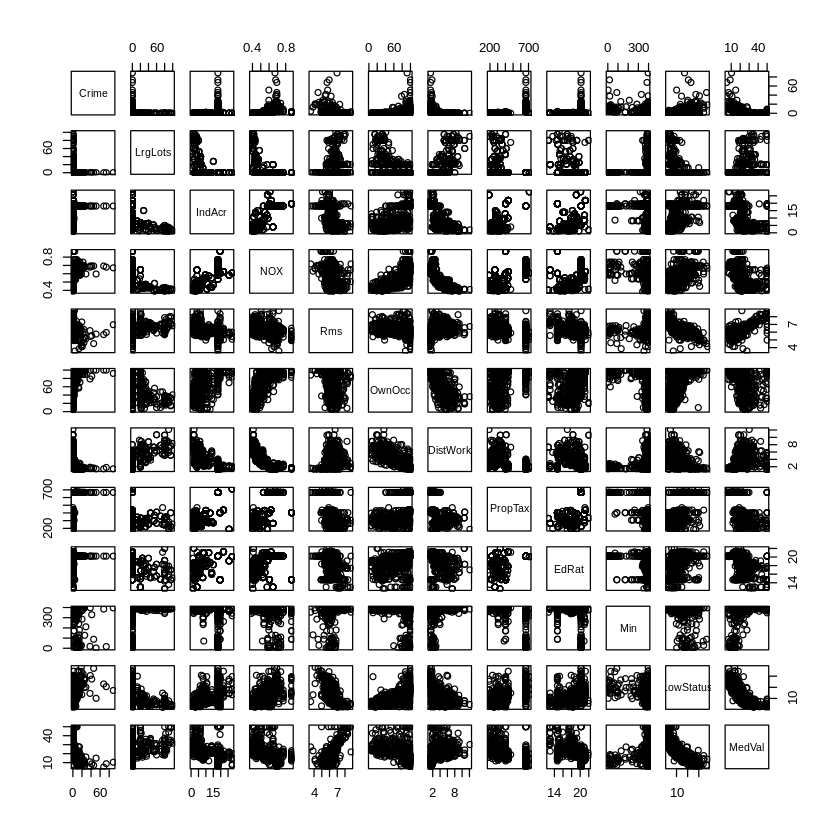

In [6]:
pairs(BostonNum)

#### Let's try a more limited set of features, those that we consider most important.  These we are plotting against the target, *MedVal*, the median value of houses in the neighborhood.  We can see more clearly that linear relationships exist.  We can even make a guess about correlation by the tightness of the pattern around what we imagine what might be the regression line.

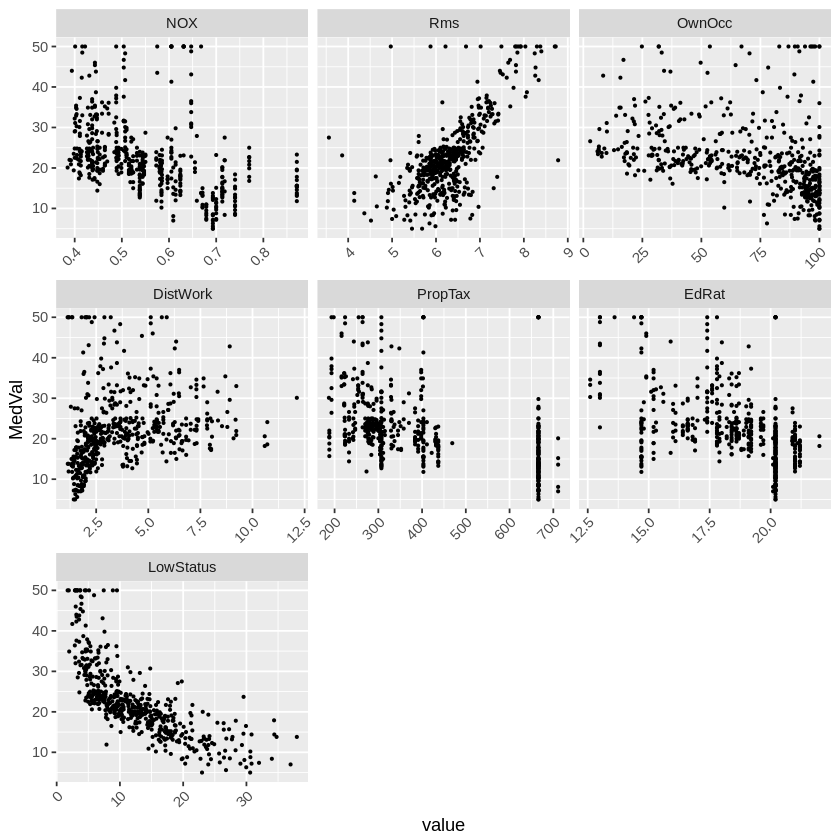

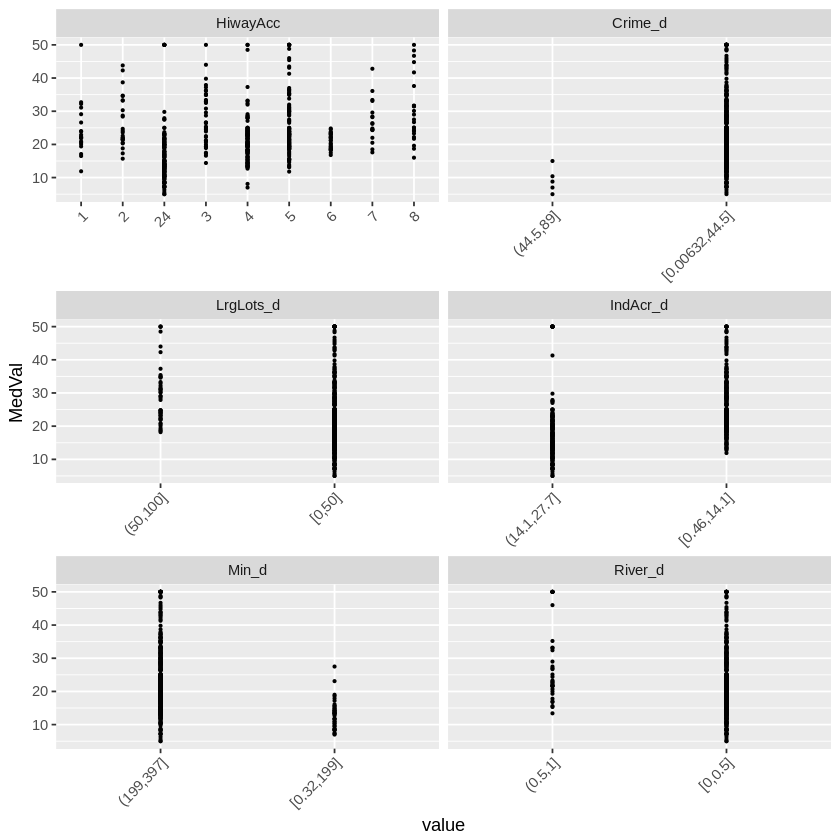

In [7]:
plot_scatterplot(subset(Boston, select = -c(Crime, LrgLots, IndAcr, Min, River)), by = 'MedVal', size = 0.5)

#### We can better see correlations between features using a correlation table.  Below, we have combined a correlation table with a heatmap to get an idea where strong correlations might exist.  We define "strong" to mean greater than 0.7 or less than -0.7.

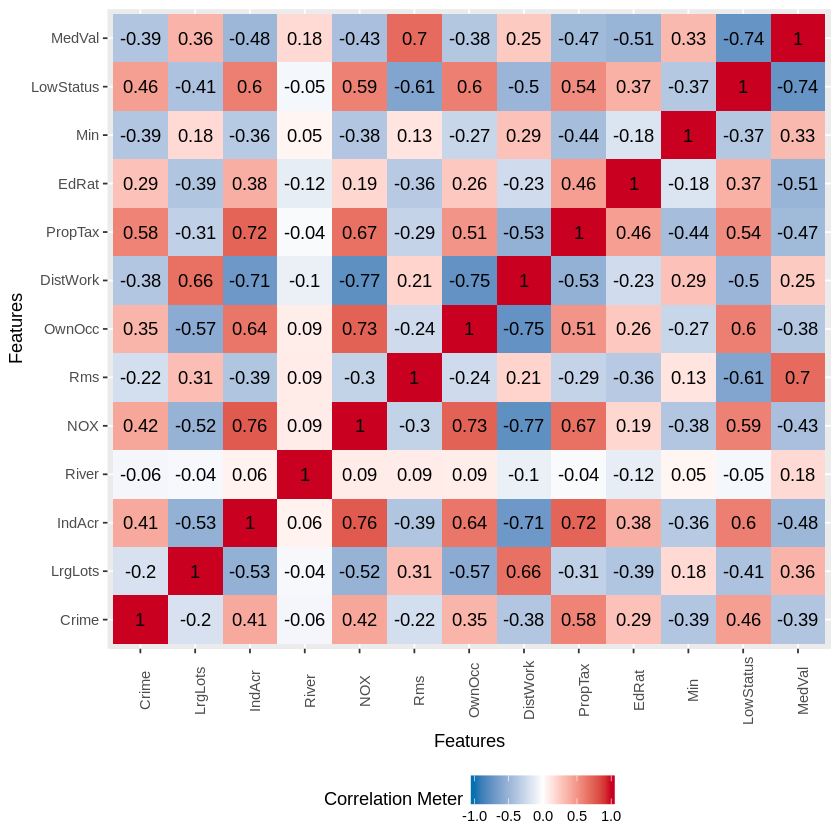

In [8]:
plot_correlation(Boston, type = 'continuous')

#### This is better but we still need something more definitive.  As a measure of redundancy, we are going to use the Variance Inflation Factor test.  We run it two different ways to see results from different perspectives.

In [9]:
vif(BostonNum)
vifcor(BostonNum, th = 0.7)

Variables,VIF
Crime,1.679135
LrgLots,2.309858
IndAcr,3.664248
NOX,4.415901
Rms,2.249750
OwnOcc,3.077429
DistWork,4.380332
PropTax,3.404046
EdRat,1.877527
Min,1.366634


4 variables from the 12 input variables have collinearity problem: 
 
NOX DistWork LowStatus IndAcr 

After excluding the collinear variables, the linear correlation coefficients ranges between: 
min correlation ( Min ~ Rms ):  0.1280686 
max correlation ( MedVal ~ Rms ):  0.6953599 

---------- VIFs of the remained variables -------- 
  Variables      VIF
1     Crime 1.601151
2   LrgLots 1.689352
3       Rms 2.016664
4    OwnOcc 1.871398
5   PropTax 2.188637
6     EdRat 1.609150
7       Min 1.345187
8    MedVal 2.693539

#### The top table shows results from the first test.  It does not find any collinearity between the features, so it returns all the columns.  But the second test indicates that four features appear to be highly correlated.  When building our model, we would be careful with these four to avoid overfitting.  We might use one or two of them, but not all.